In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-learn
!pip install statsmodels



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------- ----------------------------- 2.6/9.8 MB 16.7 MB/s eta 0:00:01
   ---------------------- ----------------- 5.5/9.8 MB 14.6 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.8 MB 14.5 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 14.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Q6 List down the compounded annual growth rate (CAGR) in 4-wheeler units for the top 5 makers from 2022 to 2024.

In [2]:
df_date = pd.read_csv("../datasets/dim_date.csv")
df_date.head()
df_maker = pd.read_csv("../datasets/electric_vehicle_sales_by_makers.csv")
df_maker.head()

,date,vehicle_category,maker,electric_vehicles_sold
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0
1,01-Apr-22,2-Wheelers,OKAYA EV,0
2,01-May-21,2-Wheelers,OLA ELECTRIC,0
3,01-Jun-21,2-Wheelers,OLA ELECTRIC,0
4,01-Jul-21,2-Wheelers,OLA ELECTRIC,0


In [3]:
df_date["date"] = pd.to_datetime(df_date["date"], format = "%d-%b-%y")
df_date
df_maker["date"] = pd.to_datetime(df_maker["date"], format = "%d-%b-%y")
df_maker

,date,vehicle_category,maker,electric_vehicles_sold
0,2021-04-01,2-Wheelers,OLA ELECTRIC,0
1,2022-04-01,2-Wheelers,OKAYA EV,0
2,2021-05-01,2-Wheelers,OLA ELECTRIC,0
3,2021-06-01,2-Wheelers,OLA ELECTRIC,0
4,2021-07-01,2-Wheelers,OLA ELECTRIC,0
...,...,...,...,...
811,2024-03-01,2-Wheelers,BGAUSS,3070
812,2024-03-01,2-Wheelers,BATTRE ELECTRIC,625
813,2024-03-01,2-Wheelers,KINETIC GREEN,3915
814,2024-03-01,2-Wheelers,REVOLT,585


In [6]:
df_maker_4wheeler = df_maker[df_maker["vehicle_category"]=="4-Wheelers"]
df_maker_4wheeler

,date,vehicle_category,maker,electric_vehicles_sold
9,2021-04-01,4-Wheelers,BYD India,0
10,2021-04-01,4-Wheelers,PCA Automobiles,0
11,2021-04-01,4-Wheelers,BMW India,0
12,2021-04-01,4-Wheelers,Volvo Auto India,0
13,2021-04-01,4-Wheelers,KIA Motors,0
...,...,...,...,...
364,2024-03-01,4-Wheelers,PCA Automobiles,130
365,2024-03-01,4-Wheelers,BMW India,55
366,2024-03-01,4-Wheelers,Mercedes -Benz AG,31
367,2024-03-01,4-Wheelers,Volvo Auto India,39


In [7]:
df_datemaker = df_date.merge(df_maker_4wheeler, on="date", how="left")
df_datemaker

,date,fiscal_year,quarter,vehicle_category,maker,electric_vehicles_sold
0,2021-04-01,2022,Q1,4-Wheelers,BYD India,0
1,2021-04-01,2022,Q1,4-Wheelers,PCA Automobiles,0
2,2021-04-01,2022,Q1,4-Wheelers,BMW India,0
3,2021-04-01,2022,Q1,4-Wheelers,Volvo Auto India,0
4,2021-04-01,2022,Q1,4-Wheelers,KIA Motors,0
...,...,...,...,...,...,...
355,2024-03-01,2024,Q4,4-Wheelers,PCA Automobiles,130
356,2024-03-01,2024,Q4,4-Wheelers,BMW India,55
357,2024-03-01,2024,Q4,4-Wheelers,Mercedes -Benz AG,31
358,2024-03-01,2024,Q4,4-Wheelers,Volvo Auto India,39


In [8]:
df_datemaker = df_datemaker.groupby(["fiscal_year","maker"])["electric_vehicles_sold"].sum().reset_index()
df_datemaker

,fiscal_year,maker,electric_vehicles_sold
0,2022,BMW India,7
1,2022,BYD India,33
2,2022,Hyundai Motor,110
3,2022,KIA Motors,0
4,2022,MG Motor,1647
5,2022,Mahindra & Mahindra,4042
6,2022,Mercedes -Benz AG,26
7,2022,PCA Automobiles,0
8,2022,Tata Motors,12708
9,2022,Volvo Auto India,4


In [21]:
df_datemaker = df_datemaker.sort_values(by=["fiscal_year","electric_vehicles_sold"], ascending=[True,False])
df_datemaker

,fiscal_year,maker,electric_vehicles_sold
8,2022,Tata Motors,12708
5,2022,Mahindra & Mahindra,4042
4,2022,MG Motor,1647
2,2022,Hyundai Motor,110
1,2022,BYD India,33
6,2022,Mercedes -Benz AG,26
0,2022,BMW India,7
9,2022,Volvo Auto India,4
7,2022,PCA Automobiles,0
3,2022,KIA Motors,0


In [22]:
first_five = df_datemaker.groupby("fiscal_year").head()
first_five

,fiscal_year,maker,electric_vehicles_sold
8,2022,Tata Motors,12708
5,2022,Mahindra & Mahindra,4042
4,2022,MG Motor,1647
2,2022,Hyundai Motor,110
1,2022,BYD India,33
18,2023,Tata Motors,28046
15,2023,Mahindra & Mahindra,13805
14,2023,MG Motor,3277
11,2023,BYD India,920
12,2023,Hyundai Motor,576


In [23]:
hyun_sales_2024 = df_datemaker[(df_datemaker["maker"]=="Hyundai Motor") & (df_datemaker["fiscal_year"]==2024)]
hyun_sales_2024

,fiscal_year,maker,electric_vehicles_sold
22,2024,Hyundai Motor,1390


ValueError: Length mismatch: Expected axis has 3 elements, new values have 4 elements

In [47]:
merged_df = pd.concat([first_five, hyun_sales_2024])
merged_df

,fiscal_year,maker,electric_vehicles_sold_x,electric_vehicles_sold_y,electric_vehicles_sold
0,2022,Tata Motors,12708.0,NaN,NaN
1,2022,Mahindra & Mahindra,4042.0,NaN,NaN
2,2022,MG Motor,1647.0,NaN,NaN
3,2022,Hyundai Motor,110.0,NaN,NaN
4,2022,BYD India,33.0,NaN,NaN
5,2023,Tata Motors,28046.0,NaN,NaN
6,2023,Mahindra & Mahindra,13805.0,NaN,NaN
7,2023,MG Motor,3277.0,NaN,NaN
8,2023,BYD India,920.0,NaN,NaN
9,2023,Hyundai Motor,576.0,NaN,NaN


In [49]:
# Combine the relevant columns into 'electric_vehicles_sold'
merged_df['electric_vehicles_sold'] = merged_df['electric_vehicles_sold'].combine_first(merged_df['electric_vehicles_sold_x']).combine_first(merged_df['electric_vehicles_sold_y'])

# Drop the extra columns
merged_df = merged_df.drop(columns=['electric_vehicles_sold_x', 'electric_vehicles_sold_y'])

# Check the resulting DataFrame
merged_df


,fiscal_year,maker,electric_vehicles_sold
0,2022,Tata Motors,12708.0
1,2022,Mahindra & Mahindra,4042.0
2,2022,MG Motor,1647.0
3,2022,Hyundai Motor,110.0
4,2022,BYD India,33.0
5,2023,Tata Motors,28046.0
6,2023,Mahindra & Mahindra,13805.0
7,2023,MG Motor,3277.0
8,2023,BYD India,920.0
9,2023,Hyundai Motor,576.0


In [50]:
total_ev_sales = df_datemaker.groupby("fiscal_year")["electric_vehicles_sold"].sum()
total_ev_sales

fiscal_year
2022    18577
2023    47465
2024    86901
Name: electric_vehicles_sold, dtype: int64

In [51]:
total_ev_sales = total_ev_sales.reset_index(name='total_electric_vehicles_sold')
total_ev_sales

,fiscal_year,total_electric_vehicles_sold
0,2022,18577
1,2023,47465
2,2024,86901


In [53]:
merged_df = pd.merge(merged_df,total_ev_sales, on="fiscal_year", how="inner")
merged_df

,fiscal_year,maker,electric_vehicles_sold,total_electric_vehicles_sold
0,2022,Tata Motors,12708.0,18577
1,2022,Mahindra & Mahindra,4042.0,18577
2,2022,MG Motor,1647.0,18577
3,2022,Hyundai Motor,110.0,18577
4,2022,BYD India,33.0,18577
5,2023,Tata Motors,28046.0,47465
6,2023,Mahindra & Mahindra,13805.0,47465
7,2023,MG Motor,3277.0,47465
8,2023,BYD India,920.0,47465
9,2023,Hyundai Motor,576.0,47465


In [55]:
merged_df["market_share"] = (merged_df["electric_vehicles_sold"]/merged_df["total_electric_vehicles_sold"])*100
merged_df

,fiscal_year,maker,electric_vehicles_sold,total_electric_vehicles_sold,market_share
0,2022,Tata Motors,12708.0,18577,68.407170
1,2022,Mahindra & Mahindra,4042.0,18577,21.758088
2,2022,MG Motor,1647.0,18577,8.865802
3,2022,Hyundai Motor,110.0,18577,0.592130
4,2022,BYD India,33.0,18577,0.177639
5,2023,Tata Motors,28046.0,47465,59.087749
6,2023,Mahindra & Mahindra,13805.0,47465,29.084589
7,2023,MG Motor,3277.0,47465,6.904035
8,2023,BYD India,920.0,47465,1.938270
9,2023,Hyundai Motor,576.0,47465,1.213526


In [57]:
def calculate_cagr(group):
    # Check if both 2022 and 2024 data are available for the maker
    if 2022 in group['fiscal_year'].values and 2024 in group['fiscal_year'].values:
        beginning_value = group.loc[group['fiscal_year'] == 2022, 'electric_vehicles_sold'].values[0]
        ending_value = group.loc[group['fiscal_year'] == 2024, 'electric_vehicles_sold'].values[0]
        n = 2  # years between 2022 and 2024
        
        if beginning_value > 0:
            cagr = ((ending_value / beginning_value) ** (1 / n)) - 1
            return cagr
    return None  # Return None if data for 2022 or 2024 is missing

# Group data by 'maker' and apply the CAGR calculation function
makers = merged_df.groupby('maker')

# Create a new column 'CAGR' to store the result
merged_df['CAGR'] = None  # Initialize the column with None

for maker, group in makers:
    cagr_value = calculate_cagr(group)
    merged_df.loc[merged_df['maker'] == maker, 'CAGR'] = cagr_value

# Show the resulting dataframe with CAGR for each maker
merged_df


,fiscal_year,maker,electric_vehicles_sold,total_electric_vehicles_sold,market_share,CAGR
0,2022,Tata Motors,12708.0,18577,68.407170,0.94715
1,2022,Mahindra & Mahindra,4042.0,18577,21.758088,1.403301
2,2022,MG Motor,1647.0,18577,8.865802,1.315309
3,2022,Hyundai Motor,110.0,18577,0.592130,2.554766
4,2022,BYD India,33.0,18577,0.177639,5.665151
5,2023,Tata Motors,28046.0,47465,59.087749,0.94715
6,2023,Mahindra & Mahindra,13805.0,47465,29.084589,1.403301
7,2023,MG Motor,3277.0,47465,6.904035,1.315309
8,2023,BYD India,920.0,47465,1.938270,5.665151
9,2023,Hyundai Motor,576.0,47465,1.213526,2.554766


# Q7 List down the top 10 states that had the highest compounded annual growth rate (CAGR) from 2022 to 2024 in total vehicles sold. 

In [69]:
df_state = pd.read_csv("../datasets/electric_vehicle_sales_by_state.csv")
df_state.tail()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
2440,01-Mar-24,Mizoram,2-Wheelers,58,1932
2441,01-Mar-24,DNH and DD,2-Wheelers,25,780
2442,01-Mar-24,Manipur,2-Wheelers,13,1394
2443,01-Mar-24,Andaman & Nicobar Island,2-Wheelers,2,447
2444,01-Mar-24,Nagaland,2-Wheelers,2,1180


In [70]:
df_state["date"] = pd.to_datetime(df_state["date"], format="%d-%b-%y", errors='coerce')
df_state

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,2021-04-01,Sikkim,2-Wheelers,0,398
1,2021-04-01,Sikkim,4-Wheelers,0,361
2,2021-05-01,Sikkim,2-Wheelers,0,113
3,2021-05-01,Sikkim,4-Wheelers,0,98
4,2021-06-01,Sikkim,2-Wheelers,0,229
...,...,...,...,...,...
2440,2024-03-01,Mizoram,2-Wheelers,58,1932
2441,2024-03-01,DNH and DD,2-Wheelers,25,780
2442,2024-03-01,Manipur,2-Wheelers,13,1394
2443,2024-03-01,Andaman & Nicobar Island,2-Wheelers,2,447


In [79]:
date_state = pd.merge(df_date, df_state, on="date", how="left")
date_state

,date,fiscal_year,quarter,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,2021-04-01,2022,Q1,Sikkim,2-Wheelers,0,398
1,2021-04-01,2022,Q1,Sikkim,4-Wheelers,0,361
2,2021-04-01,2022,Q1,Andaman & Nicobar Island,2-Wheelers,0,515
3,2021-04-01,2022,Q1,Arunachal Pradesh,2-Wheelers,0,1256
4,2021-04-01,2022,Q1,Arunachal Pradesh,4-Wheelers,0,724
...,...,...,...,...,...,...,...
2440,2024-03-01,2024,Q4,Mizoram,2-Wheelers,58,1932
2441,2024-03-01,2024,Q4,DNH and DD,2-Wheelers,25,780
2442,2024-03-01,2024,Q4,Manipur,2-Wheelers,13,1394
2443,2024-03-01,2024,Q4,Andaman & Nicobar Island,2-Wheelers,2,447


In [102]:
total_sales_state = (
    date_state.groupby(["fiscal_year","state"])["total_vehicles_sold"].sum().reset_index()
    .sort_values(["fiscal_year","total_vehicles_sold"], ascending=[True,False])
)

total_sales_state


,fiscal_year,state,total_vehicles_sold
31,2022,Uttar Pradesh,2497288
19,2022,Maharashtra,1667002
29,2022,Tamil Nadu,1345017
10,2022,Gujarat,1094872
15,2022,Karnataka,1007894
...,...,...,...
76,2024,DNH and DD,16400
97,2024,Sikkim,10518
69,2024,Andaman & Nicobar Island,6543
86,2024,Ladakh,3206


In [103]:
total_sales_state = total_sales_state.sort_values("state", ascending=True)
total_sales_state.head(20)

,fiscal_year,state,total_vehicles_sold
68,2024,Andaman & Nicobar,660
69,2024,Andaman & Nicobar Island,6543
0,2022,Andaman & Nicobar Island,5148
34,2023,Andaman & Nicobar Island,6534
35,2023,Andhra Pradesh,728258
70,2024,Andhra Pradesh,782865
1,2022,Andhra Pradesh,772748
2,2022,Arunachal Pradesh,19929
36,2023,Arunachal Pradesh,23726
71,2024,Arunachal Pradesh,27892


In [104]:
total_sales_state["state"] = total_sales_state["state"].replace({
    "Andaman & Nicobar Island": "Andaman & Nicobar"
})

total_sales_state


,fiscal_year,state,total_vehicles_sold
68,2024,Andaman & Nicobar,660
69,2024,Andaman & Nicobar,6543
0,2022,Andaman & Nicobar,5148
34,2023,Andaman & Nicobar,6534
35,2023,Andhra Pradesh,728258
...,...,...,...
32,2022,Uttarakhand,173331
66,2023,Uttarakhand,216265
102,2024,West Bengal,961909
33,2022,West Bengal,860709


In [107]:
total_sales_state = total_sales_state.groupby(["fiscal_year","state"])["total_vehicles_sold"].sum().reset_index().sort_values("state")
total_sales_state

,fiscal_year,state,total_vehicles_sold
0,2022,Andaman & Nicobar,5148
68,2024,Andaman & Nicobar,7203
34,2023,Andaman & Nicobar,6534
1,2022,Andhra Pradesh,772748
69,2024,Andhra Pradesh,782865
...,...,...,...
32,2022,Uttarakhand,173331
66,2023,Uttarakhand,216265
67,2023,West Bengal,913558
33,2022,West Bengal,860709


In [113]:
grouped_state = total_sales_state.groupby("state")
total_sales_state["CAGR"] = None

for state,group in grouped_state:
    cagr_value = calculate_cagr(group)
    total_sales_state.loc[total_sales_state["state"]==state,"CAGR"] = cagr_value

total_sales_state

,fiscal_year,state,total_vehicles_sold,CAGR
0,2022,Andaman & Nicobar,5148,0.182871
68,2024,Andaman & Nicobar,7203,0.182871
34,2023,Andaman & Nicobar,6534,0.182871
1,2022,Andhra Pradesh,772748,0.006525
69,2024,Andhra Pradesh,782865,0.006525
...,...,...,...,...
32,2022,Uttarakhand,173331,0.159694
66,2023,Uttarakhand,216265,0.159694
67,2023,West Bengal,913558,0.057155
33,2022,West Bengal,860709,0.057155


In [ ]:
# Group data by 'maker' and apply the CAGR calculation function
#makers = merged_df.groupby('maker')

# Create a new column 'CAGR' to store the result
#merged_df['CAGR'] = None  # Initialize the column with None

#for maker, group in makers:
  #  cagr_value = calculate_cagr(group)
 #   merged_df.loc[merged_df['maker'] == maker, 'CAGR'] = cagr_value

# Show the resulting dataframe with CAGR for each maker
#merged_df

In [112]:
def calculate_cagr(group):
    # Check if both 2022 and 2024 data are available for the maker
    if 2022 in group['fiscal_year'].values and 2024 in group['fiscal_year'].values:
        beginning_value = group.loc[group['fiscal_year'] == 2022, 'total_vehicles_sold'].values[0]
        ending_value = group.loc[group['fiscal_year'] == 2024, 'total_vehicles_sold'].values[0]
        n = 2  # years between 2022 and 2024
        
        if beginning_value > 0:
            cagr = ((ending_value / beginning_value) ** (1 / n)) - 1
            return cagr
    return None  # Return None if data for 2022 or 2024 is missing



In [114]:
total_sales_state = total_sales_state.sort_values("CAGR", ascending=False)
total_sales_state

,fiscal_year,state,total_vehicles_sold,CAGR
89,2024,Meghalaya,36628,0.284691
55,2023,Meghalaya,31362,0.284691
21,2022,Meghalaya,22193,0.284691
9,2022,Goa,48372,0.274102
43,2023,Goa,73074,0.274102
...,...,...,...,...
50,2023,Kerala,736988,-0.038037
84,2024,Kerala,638114,-0.038037
88,2024,Manipur,18422,-0.285931
54,2023,Manipur,49962,-0.285931


In [115]:
total_sales_state.head(20)

,fiscal_year,state,total_vehicles_sold,CAGR
89,2024,Meghalaya,36628,0.284691
55,2023,Meghalaya,31362,0.284691
21,2022,Meghalaya,22193,0.284691
9,2022,Goa,48372,0.274102
43,2023,Goa,73074,0.274102
77,2024,Goa,78524,0.274102
83,2024,Karnataka,1581988,0.252836
15,2022,Karnataka,1007894,0.252836
49,2023,Karnataka,1404447,0.252836
8,2022,Delhi,401540,0.228843


In [121]:
top10_cagr_states = total_sales_state.groupby("state")["CAGR"].mean().reset_index().sort_values("CAGR", ascending=False)
top10_cagr_states.head(10)

,state,CAGR
21,Meghalaya,0.284691
9,Goa,0.274102
15,Karnataka,0.252836
8,Delhi,0.228843
27,Rajasthan,0.214974
10,Gujarat,0.205457
3,Assam,0.201337
22,Mizoram,0.187716
2,Arunachal Pradesh,0.183034
0,Andaman & Nicobar,0.182871


# What are the peak and low season months for EV sales based on the data from 2022 to 2024? 

In [123]:
df_date["month"] = df_date["date"].dt.month.apply(lambda x:x-3 if x>=4 else x+9)
df_date

,date,fiscal_year,quarter,month
0,2021-04-01,2022,Q1,1
1,2021-05-01,2022,Q1,2
2,2021-06-01,2022,Q1,3
3,2021-07-01,2022,Q2,4
4,2021-08-01,2022,Q2,5
5,2021-09-01,2022,Q2,6
6,2021-10-01,2022,Q3,7
7,2021-11-01,2022,Q3,8
8,2021-12-01,2022,Q3,9
9,2022-01-01,2022,Q4,10


In [124]:
q8_date_maker = pd.merge(df_date, df_maker, on="date", how="left")
q8_date_maker

,date,fiscal_year,quarter,month,vehicle_category,maker,electric_vehicles_sold
0,2021-04-01,2022,Q1,1,2-Wheelers,OLA ELECTRIC,0
1,2021-04-01,2022,Q1,1,4-Wheelers,BYD India,0
2,2021-04-01,2022,Q1,1,4-Wheelers,PCA Automobiles,0
3,2021-04-01,2022,Q1,1,4-Wheelers,BMW India,0
4,2021-04-01,2022,Q1,1,4-Wheelers,Volvo Auto India,0
...,...,...,...,...,...,...,...
811,2024-03-01,2024,Q4,12,2-Wheelers,BGAUSS,3070
812,2024-03-01,2024,Q4,12,2-Wheelers,BATTRE ELECTRIC,625
813,2024-03-01,2024,Q4,12,2-Wheelers,KINETIC GREEN,3915
814,2024-03-01,2024,Q4,12,2-Wheelers,REVOLT,585


In [126]:
q8_date_maker = q8_date_maker.groupby(["fiscal_year","month"])["electric_vehicles_sold"].sum().reset_index()
q8_date_maker

,fiscal_year,month,electric_vehicles_sold
0,2022,1,6315
1,2022,2,1499
2,2022,3,5487
3,2022,4,15794
4,2022,5,17153
5,2022,6,19351
6,2022,7,22190
7,2022,8,26159
8,2022,9,29241
9,2022,10,31672


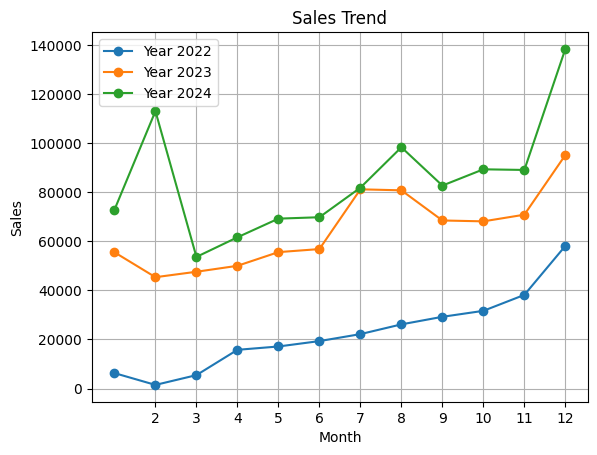

In [130]:
for year in q8_date_maker['fiscal_year'].unique():
    subset = q8_date_maker[q8_date_maker['fiscal_year'] == year]
    plt.plot(subset['month'], subset['electric_vehicles_sold'], marker='o', linestyle='-', label=f'Year {year}')

# Formatting
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales Trend')
plt.xticks(range(2, 13))  # Set x-axis ticks from Feb to Dec
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [145]:
from sklearn.cluster import KMeans
clustered_data = []
for year, subset in q8_date_maker.groupby("fiscal_year"):
    kmeans = KMeans(n_clusters=2)  # 2 clusters: Peak & Low seasons
    subset["cluster"] = kmeans.fit_predict(subset[["electric_vehicles_sold"]])
    clustered_data.append(subset)

clustered_data

[       fiscal_year  electric_vehicles_sold  cluster   rolling_avg
 month                                                            
 1             2022                    6315        0           NaN
 2             2022                    1499        0   4433.666667
 3             2022                    5487        0   7593.333333
 4             2022                   15794        0  12811.333333
 5             2022                   17153        0  17432.666667
 6             2022                   19351        0  19564.666667
 7             2022                   22190        0  22566.666667
 8             2022                   26159        0  25863.333333
 9             2022                   29241        0  29024.000000
 10            2022                   31672        0  33028.000000
 11            2022                   38171        1  42653.666667
 12            2022                   58118        1  50604.333333,
        fiscal_year  electric_vehicles_sold  cluster   rollin

In [142]:
# Calculate mean sales for each cluster
cluster_means = q8_date_maker.groupby("cluster")["electric_vehicles_sold"].mean()
print(cluster_means)


cluster
0    77732.045455
1    25429.000000
Name: electric_vehicles_sold, dtype: float64


#  What is the projected number of EV sales (including 2-wheelers and 4wheelers) for the top 10 states by penetration rate in 2030, based on the compounded annual growth rate (CAGR) from previous years?

In [151]:
date_state

,date,fiscal_year,quarter,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,2021-04-01,2022,Q1,Sikkim,2-Wheelers,0,398
1,2021-04-01,2022,Q1,Sikkim,4-Wheelers,0,361
2,2021-04-01,2022,Q1,Andaman & Nicobar Island,2-Wheelers,0,515
3,2021-04-01,2022,Q1,Arunachal Pradesh,2-Wheelers,0,1256
4,2021-04-01,2022,Q1,Arunachal Pradesh,4-Wheelers,0,724
...,...,...,...,...,...,...,...
2440,2024-03-01,2024,Q4,Mizoram,2-Wheelers,58,1932
2441,2024-03-01,2024,Q4,DNH and DD,2-Wheelers,25,780
2442,2024-03-01,2024,Q4,Manipur,2-Wheelers,13,1394
2443,2024-03-01,2024,Q4,Andaman & Nicobar Island,2-Wheelers,2,447


In [155]:
grouped_data = date_state.groupby(["fiscal_year","state","vehicle_category"])[["electric_vehicles_sold","total_vehicles_sold"]].sum().reset_index()
grouped_data

,fiscal_year,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,2022,Andaman & Nicobar Island,2-Wheelers,0,3979
1,2022,Andaman & Nicobar Island,4-Wheelers,22,1169
2,2022,Andhra Pradesh,2-Wheelers,13465,685787
3,2022,Andhra Pradesh,4-Wheelers,463,86961
4,2022,Arunachal Pradesh,2-Wheelers,0,12241
...,...,...,...,...,...
201,2024,Uttar Pradesh,4-Wheelers,5245,407195
202,2024,Uttarakhand,2-Wheelers,5775,175010
203,2024,Uttarakhand,4-Wheelers,561,58101
204,2024,West Bengal,2-Wheelers,14016,855595


In [156]:
grouped_data = grouped_data.sort_values("state", ascending=True)
grouped_data

,fiscal_year,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
136,2024,Andaman & Nicobar,2-Wheelers,2,483
137,2024,Andaman & Nicobar,4-Wheelers,0,177
138,2024,Andaman & Nicobar Island,2-Wheelers,18,4766
139,2024,Andaman & Nicobar Island,4-Wheelers,15,1777
69,2023,Andaman & Nicobar Island,4-Wheelers,6,1776
...,...,...,...,...,...
67,2022,West Bengal,4-Wheelers,418,93782
204,2024,West Bengal,2-Wheelers,14016,855595
135,2023,West Bengal,4-Wheelers,1431,105466
134,2023,West Bengal,2-Wheelers,9580,808092


In [159]:
grouped_data["state"] = grouped_data["state"].replace("Andaman & Nicobar","Andaman & Nicobar Island")
grouped_data

,fiscal_year,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
136,2024,Andaman & Nicobar Island,2-Wheelers,2,483
137,2024,Andaman & Nicobar Island,4-Wheelers,0,177
138,2024,Andaman & Nicobar Island,2-Wheelers,18,4766
139,2024,Andaman & Nicobar Island,4-Wheelers,15,1777
69,2023,Andaman & Nicobar Island,4-Wheelers,6,1776
...,...,...,...,...,...
67,2022,West Bengal,4-Wheelers,418,93782
204,2024,West Bengal,2-Wheelers,14016,855595
135,2023,West Bengal,4-Wheelers,1431,105466
134,2023,West Bengal,2-Wheelers,9580,808092


In [164]:
grouped_data = grouped_data.groupby(["fiscal_year","state"])[["electric_vehicles_sold","total_vehicles_sold"]].sum().reset_index()
grouped_data

,fiscal_year,state,electric_vehicles_sold,total_vehicles_sold
0,2022,Andaman & Nicobar Island,22,5148
1,2022,Andhra Pradesh,13928,772748
2,2022,Arunachal Pradesh,0,19929
3,2022,Assam,730,379450
4,2022,Bihar,4829,892873
...,...,...,...,...
97,2024,Tamil Nadu,94314,1716940
98,2024,Tripura,304,46447
99,2024,Uttar Pradesh,57758,2932347
100,2024,Uttarakhand,6336,233111


In [165]:
grouped_data = grouped_data.sort_values("state", ascending=True)
grouped_data.head(20)

,fiscal_year,state,electric_vehicles_sold,total_vehicles_sold
0,2022,Andaman & Nicobar Island,22,5148
68,2024,Andaman & Nicobar Island,35,7203
34,2023,Andaman & Nicobar Island,23,6534
1,2022,Andhra Pradesh,13928,772748
69,2024,Andhra Pradesh,33183,782865
35,2023,Andhra Pradesh,30311,728258
2,2022,Arunachal Pradesh,0,19929
70,2024,Arunachal Pradesh,31,27892
36,2023,Arunachal Pradesh,2,23726
3,2022,Assam,730,379450


In [166]:
grouped_data.tail(20)

,fiscal_year,state,electric_vehicles_sold,total_vehicles_sold
27,2022,Rajasthan,20087,880985
61,2023,Rajasthan,63835,1126130
62,2023,Sikkim,0,9931
96,2024,Sikkim,0,10518
28,2022,Sikkim,0,8897
29,2022,Tamil Nadu,36863,1345017
97,2024,Tamil Nadu,94314,1716940
63,2023,Tamil Nadu,68885,1590406
30,2022,Tripura,28,37735
98,2024,Tripura,304,46447


In [170]:
grouped_data["penetration_rate%"] = (grouped_data["electric_vehicles_sold"]/grouped_data["total_vehicles_sold"])*100
grouped_data

,fiscal_year,state,electric_vehicles_sold,total_vehicles_sold,penetration_rate,penetration_rate%
0,2022,Andaman & Nicobar Island,22,5148,0.427350,0.427350
68,2024,Andaman & Nicobar Island,35,7203,0.485909,0.485909
34,2023,Andaman & Nicobar Island,23,6534,0.352005,0.352005
1,2022,Andhra Pradesh,13928,772748,1.802399,1.802399
69,2024,Andhra Pradesh,33183,782865,4.238662,4.238662
...,...,...,...,...,...,...
32,2022,Uttarakhand,2079,173331,1.199439,1.199439
66,2023,Uttarakhand,6712,216265,3.103600,3.103600
67,2023,West Bengal,11011,913558,1.205287,1.205287
33,2022,West Bengal,2685,860709,0.311952,0.311952


In [172]:
grouped_data = grouped_data.drop(columns=["penetration_rate"])
grouped_data

,fiscal_year,state,electric_vehicles_sold,total_vehicles_sold,penetration_rate%
0,2022,Andaman & Nicobar Island,22,5148,0.427350
68,2024,Andaman & Nicobar Island,35,7203,0.485909
34,2023,Andaman & Nicobar Island,23,6534,0.352005
1,2022,Andhra Pradesh,13928,772748,1.802399
69,2024,Andhra Pradesh,33183,782865,4.238662
...,...,...,...,...,...
32,2022,Uttarakhand,2079,173331,1.199439
66,2023,Uttarakhand,6712,216265,3.103600
67,2023,West Bengal,11011,913558,1.205287
33,2022,West Bengal,2685,860709,0.311952


In [173]:
grouped_data["penetration_rate%"] = grouped_data["penetration_rate%"].round(2)
grouped_data

,fiscal_year,state,electric_vehicles_sold,total_vehicles_sold,penetration_rate%
0,2022,Andaman & Nicobar Island,22,5148,0.43
68,2024,Andaman & Nicobar Island,35,7203,0.49
34,2023,Andaman & Nicobar Island,23,6534,0.35
1,2022,Andhra Pradesh,13928,772748,1.80
69,2024,Andhra Pradesh,33183,782865,4.24
...,...,...,...,...,...
32,2022,Uttarakhand,2079,173331,1.20
66,2023,Uttarakhand,6712,216265,3.10
67,2023,West Bengal,11011,913558,1.21
33,2022,West Bengal,2685,860709,0.31


In [183]:
grouped_state = grouped_data.groupby("state")
grouped_data["CAGR"] = None

for state,group in grouped_state:
    cagr_value = calculate_cagr(group)
    grouped_data.loc[grouped_data["state"]==state,"CAGR"] = cagr_value

grouped_data

,fiscal_year,state,electric_vehicles_sold,total_vehicles_sold,penetration_rate%,CAGR
0,2022,Andaman & Nicobar Island,22,5148,0.43,0.261312
68,2024,Andaman & Nicobar Island,35,7203,0.49,0.261312
34,2023,Andaman & Nicobar Island,23,6534,0.35,0.261312
1,2022,Andhra Pradesh,13928,772748,1.80,0.543524
69,2024,Andhra Pradesh,33183,782865,4.24,0.543524
...,...,...,...,...,...,...
32,2022,Uttarakhand,2079,173331,1.20,0.745743
66,2023,Uttarakhand,6712,216265,3.10,0.745743
67,2023,West Bengal,11011,913558,1.21,1.506156
33,2022,West Bengal,2685,860709,0.31,1.506156


In [182]:
def calculate_cagr(group):
    # Check if both 2022 and 2024 data are available for the maker
    if 2022 in group['fiscal_year'].values and 2024 in group['fiscal_year'].values:
        beginning_value = group.loc[group['fiscal_year'] == 2022, 'electric_vehicles_sold'].values[0]
        ending_value = group.loc[group['fiscal_year'] == 2024, 'electric_vehicles_sold'].values[0]
        n = 2  # years between 2022 and 2024
        
        if beginning_value > 0:
            cagr = ((ending_value / beginning_value) ** (1 / n)) - 1
            return cagr
    return None 

In [185]:
grouped_data.tail(20)

,fiscal_year,state,electric_vehicles_sold,total_vehicles_sold,penetration_rate%,CAGR
27,2022,Rajasthan,20087,880985,2.28,0.818739
61,2023,Rajasthan,63835,1126130,5.67,0.818739
62,2023,Sikkim,0,9931,0.00,None
96,2024,Sikkim,0,10518,0.00,None
28,2022,Sikkim,0,8897,0.00,None
29,2022,Tamil Nadu,36863,1345017,2.74,0.599531
97,2024,Tamil Nadu,94314,1716940,5.49,0.599531
63,2023,Tamil Nadu,68885,1590406,4.33,0.599531
30,2022,Tripura,28,37735,0.07,2.295018
98,2024,Tripura,304,46447,0.65,2.295018


In [189]:
grouped_data["sales_2030"] = None
for state,group in grouped_state:
    proj_sales = sales_2030(group)
    grouped_data.loc[grouped_data["state"]==state, "sales_2030"] = proj_sales
grouped_data

,fiscal_year,state,electric_vehicles_sold,total_vehicles_sold,penetration_rate%,CAGR,sales_2030
0,2022,Andaman & Nicobar Island,22,5148,0.43,0.261312,88.584711
68,2024,Andaman & Nicobar Island,35,7203,0.49,0.261312,88.584711
34,2023,Andaman & Nicobar Island,23,6534,0.35,0.261312,88.584711
1,2022,Andhra Pradesh,13928,772748,1.80,0.543524,188351.648201
69,2024,Andhra Pradesh,33183,782865,4.24,0.543524,188351.648201
...,...,...,...,...,...,...,...
32,2022,Uttarakhand,2079,173331,1.20,0.745743,58848.653061
66,2023,Uttarakhand,6712,216265,3.10,0.745743,58848.653061
67,2023,West Bengal,11011,913558,1.21,1.506156,665262.740523
33,2022,West Bengal,2685,860709,0.31,1.506156,665262.740523


In [188]:
def sales_2030(group):
    if group["CAGR"].notna().any():
        initial_value = group.loc[group["fiscal_year"]==2022, "electric_vehicles_sold"].values[0];
        cagr_value = group["CAGR"]
        n = 6
        proj_sales = initial_value*((1+cagr_value)**n)
        return proj_sales
    else:
        return None

In [190]:
sales_2022 = grouped_data[grouped_data["fiscal_year"]==2022]
sales_2022

,fiscal_year,state,electric_vehicles_sold,total_vehicles_sold,penetration_rate%,CAGR,sales_2030
0,2022,Andaman & Nicobar Island,22,5148,0.43,0.261312,88.584711
1,2022,Andhra Pradesh,13928,772748,1.80,0.543524,188351.648201
2,2022,Arunachal Pradesh,0,19929,0.00,None,None
3,2022,Assam,730,379450,0.19,1.188701,80249.285932
4,2022,Bihar,4829,892873,0.54,0.7665,146736.747286
5,2022,Chandigarh,411,36954,1.11,1.645751,140973.0
6,2022,Chhattisgarh,4534,390272,1.16,1.508917,1130834.044554
7,2022,DNH and DD,35,12413,0.28,1.378475,6336.646531
8,2022,Delhi,16535,401540,4.12,0.681001,373088.314984
9,2022,Goa,1778,48372,3.68,1.464483,398370.444541


In [192]:
grouped_data["sales_2030"] = pd.to_numeric(grouped_data["sales_2030"])
grouped_data["sales_2030"] = grouped_data["sales_2030"].round(2)
grouped_data

,fiscal_year,state,electric_vehicles_sold,total_vehicles_sold,penetration_rate%,CAGR,sales_2030
0,2022,Andaman & Nicobar Island,22,5148,0.43,0.261312,88.58
68,2024,Andaman & Nicobar Island,35,7203,0.49,0.261312,88.58
34,2023,Andaman & Nicobar Island,23,6534,0.35,0.261312,88.58
1,2022,Andhra Pradesh,13928,772748,1.80,0.543524,188351.65
69,2024,Andhra Pradesh,33183,782865,4.24,0.543524,188351.65
...,...,...,...,...,...,...,...
32,2022,Uttarakhand,2079,173331,1.20,0.745743,58848.65
66,2023,Uttarakhand,6712,216265,3.10,0.745743,58848.65
67,2023,West Bengal,11011,913558,1.21,1.506156,665262.74
33,2022,West Bengal,2685,860709,0.31,1.506156,665262.74


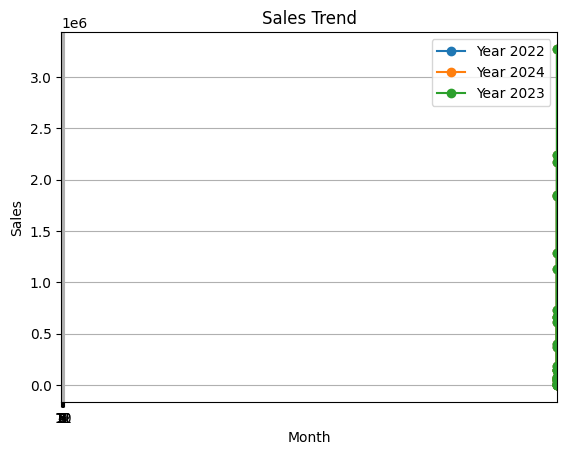

In [195]:
for year in grouped_data['fiscal_year'].unique():
    subset = grouped_data[grouped_data['fiscal_year'] == year]
    plt.plot(subset['fiscal_year'], subset['sales_2030'], marker='o', linestyle='-', label=f'Year {year}')

# Formatting
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales Trend')
plt.xticks(range(2, 13))  # Set x-axis ticks from Feb to Dec
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Estimate the revenue growth rate of 4-wheeler and 2-wheelers EVs in India for 2022 vs 2024 and 2023 vs 2024, assuming an average unit price.
# Vehicle_category     Average_price
# 2-Wheelers            85,000
# 4-Wheelers            1,15,000

In [198]:
date_state

,date,fiscal_year,quarter,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,2021-04-01,2022,Q1,Sikkim,2-Wheelers,0,398
1,2021-04-01,2022,Q1,Sikkim,4-Wheelers,0,361
2,2021-04-01,2022,Q1,Andaman & Nicobar Island,2-Wheelers,0,515
3,2021-04-01,2022,Q1,Arunachal Pradesh,2-Wheelers,0,1256
4,2021-04-01,2022,Q1,Arunachal Pradesh,4-Wheelers,0,724
...,...,...,...,...,...,...,...
2440,2024-03-01,2024,Q4,Mizoram,2-Wheelers,58,1932
2441,2024-03-01,2024,Q4,DNH and DD,2-Wheelers,25,780
2442,2024-03-01,2024,Q4,Manipur,2-Wheelers,13,1394
2443,2024-03-01,2024,Q4,Andaman & Nicobar Island,2-Wheelers,2,447


In [203]:
total_sales_2wheeler = date_state.groupby(["fiscal_year","vehicle_category"])["electric_vehicles_sold"].sum().reset_index()
total_sales_2wheeler = total_sales_2wheeler[total_sales_2wheeler["vehicle_category"]=="2-Wheelers"]
total_sales_2wheeler

,fiscal_year,vehicle_category,electric_vehicles_sold
0,2022,2-Wheelers,252573
2,2023,2-Wheelers,727903
4,2024,2-Wheelers,932692


In [204]:
total_sales_4wheeler = date_state.groupby(["fiscal_year","vehicle_category"])["electric_vehicles_sold"].sum().reset_index()
total_sales_4wheeler = total_sales_4wheeler[total_sales_4wheeler["vehicle_category"]=="4-Wheelers"]
total_sales_4wheeler

,fiscal_year,vehicle_category,electric_vehicles_sold
1,2022,4-Wheelers,18577
3,2023,4-Wheelers,47465
5,2024,4-Wheelers,86901


In [205]:
total_sales_2wheeler["revenue"] = total_sales_2wheeler["electric_vehicles_sold"]*85000
total_sales_2wheeler

,fiscal_year,vehicle_category,electric_vehicles_sold,revenue
0,2022,2-Wheelers,252573,21468705000
2,2023,2-Wheelers,727903,61871755000
4,2024,2-Wheelers,932692,79278820000


In [206]:
total_sales_4wheeler["revenue"] = total_sales_4wheeler["electric_vehicles_sold"]*1500000
total_sales_4wheeler

,fiscal_year,vehicle_category,electric_vehicles_sold,revenue
1,2022,4-Wheelers,18577,27865500000
3,2023,4-Wheelers,47465,71197500000
5,2024,4-Wheelers,86901,130351500000


In [216]:
current_year_2024 = total_sales_2wheeler.loc[total_sales_2wheeler["fiscal_year"]==2024, "revenue"].values[0]
previous_year_2022 = total_sales_2wheeler.loc[total_sales_2wheeler["fiscal_year"]==2022, "revenue"].values[0]
growth_pct2024_22_2wheeler = ((current_year_2024-previous_year_2022)/previous_year_2022)*100
growth_pct2024_22_2wheeler.round(2)

269.28

In [217]:
current_year_2024 = total_sales_4wheeler.loc[total_sales_4wheeler["fiscal_year"]==2024, "revenue"].values[0]
previous_year_2022 = total_sales_4wheeler.loc[total_sales_4wheeler["fiscal_year"]==2022, "revenue"].values[0]
growth_pct2024_22_4wheeler = ((current_year_2024-previous_year_2022)/previous_year_2022)*100
growth_pct2024_22_4wheeler.round(2)

367.79

In [218]:
current_year_2024 = total_sales_2wheeler.loc[total_sales_2wheeler["fiscal_year"]==2024, "revenue"].values[0]
previous_year_2023 = total_sales_2wheeler.loc[total_sales_2wheeler["fiscal_year"]==2023, "revenue"].values[0]
growth_pct2024_23_2wheeler = ((current_year_2024-previous_year_2022)/previous_year_2022)*100
growth_pct2024_23_2wheeler.round(2)

184.51

In [219]:
current_year_2024 = total_sales_4wheeler.loc[total_sales_4wheeler["fiscal_year"]==2024, "revenue"].values[0]
previous_year_2022 = total_sales_4wheeler.loc[total_sales_4wheeler["fiscal_year"]==2023, "revenue"].values[0]
growth_pct2024_23_4wheeler = ((current_year_2024-previous_year_2022)/previous_year_2022)*100
growth_pct2024_23_4wheeler.round(2)

83.08